<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 1 Part 2: Introduction to Imaging</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Make your imaging system more quantitative
- Learn the focal length of your imaging system
- Redesign your microscope for a specific magnification

</font>
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>
Scientific imaging typically requires quantitative measures. “Images are numbers” and those numbers are often significant to scientific questions. Often image values obtained by a camera are expressed in Arbitrary Digital Units (ADU), which are a function of the input light, detector sensitivity and conversion factors, and analog-to-digital conversion. You have already seen that you have a 10-bit camera whose values attain a maximum of 1023. However, scientifically, these values tend not to have a lot of absolute meaning without additional calibration. Similarly, the size and sampling of your image are dependent on how you have set up your optical system. In the following portions of the lab, you will calibrate ADU to have a scientific meaning (transmissivity) as well as establish the size and sampling of your image (so that you can label the actual sizes of features in your image).
</font>
</div>

# Make your pixel values quantitative

<div class="alert alert-block alert-success">
<font color='black'> Use the nominal microscope set up from Part 1 of the lab (including aperture wide open). Place a slide in the system and ensure that exposure and illumination settings are good. Use one of the “no filter” settings on the filter wheel (we won’t use filters for the remainder of this lab). Similarly, focus the image and call this image $Y$. </font>
</div>

In [ ]:
import os
import sys
sys.path.insert(0,r'BaITools')

import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import cv2
plt.rcParams['font.size'] = 16

from zelux import ZeluxCamera as Camera
print('Camera initialized as c')
c = Camera()
c.open()

c.get_properties()
c.set_exposure(10)
c.get_exposure()
c.set_framerate(2)
c.get_framerate()

Camera initialized as c
Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 29.87  ms
Exposure Range 	 [0.46, 26843.07]  ms
Framerate 	 2.0
Frame Range 	 [0.9, 18.0]


2.0

In [ ]:
c.set_exposure(30)

Y = c.capture().copy()
Y_8bit = cv2.normalize(Y, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('Image', Y_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div class="alert alert-block alert-warning">
<font color='black'> We would like to make the pixel values quantitative. For example, pixel values should denote the transmissivity of the sample (which can range from 0-100% transmission of the incident light). To obtain such quantitation, the system must be calibrated – e.g. what measurement values correspond to what transmission. To perform this calibration, we conduct two specialized image captures: <br/>


- “Dark” images – Turn off your LED illuminator and close the aperture all the way to prevent light from reaching the camera. Collect another set of 30 images. Average these and call this image $D$.  <br/>
- “Air-only” images – Move away from the slide (as shown in the picture below) and collect a series of 30 images with nothing in the system. Find the average of these 30 images (to reduce noise). Call this image $A$. </font>

</div>

<img src="Lab1\air_image_setup.jpg" style="width:400px">

<div class="alert alert-block alert-success">

<b>Data collection:</b> <font color='black'> $A$, $D$, and $Y$ <br/>
    
<font color='black'>1. Mathematically (using $A$, $D$, and $Y$), what is the expression to obtain quantitative transmission data? <br/>Write the expression and its derivation below. </font>
    
</div>

In [ ]:
def average_images(num_images):
    image_10bit_stack = []
    for _ in range(num_images):
        image_10bit_stack.append(c.capture().copy())
    image_8bit_stack = [cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) for img in image_10bit_stack]

    average_image_10bit = np.mean(image_10bit_stack, axis=0)
    average_image_8bit = cv2.normalize(average_image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    return average_image_8bit, average_image_10bit

def capture_image(save_name="False"):
    image_10bit = c.capture().copy()
    image_8bit = cv2.normalize(image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    cv2.imshow('Image', image_8bit)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    if save_name != "False":
        fig, ax = plt.subplots(1, figsize=(12, 5))
        x = ax.imshow(D, cmap='gray')
        fig.colorbar(x, ax=ax)
        plt.savefig(save_name)
        plt.clf()
    return image_8bit

def continuous_capture():
    c.set_exposure(30)
    while True:
        cv2.imshow('Camera', cv2.normalize(c.capture().copy(), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))
        if cv2.waitKey(30) & 0xFF == ord('s'):
            image = c.capture().copy()
            fig, ax = plt.subplots(1, figsize=(12, 5))
            x = ax.imshow(image, cmap='gray')
            fig.colorbar(x, ax=ax)
            plt.savefig('savedimage.png')
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    return image

In [ ]:

c.set_exposure(30)
num_images = 30

#setup dark

_, D = average_images(30)

fig, ax = plt.subplots(1, figsize=(12, 5))
x = ax.imshow(D, cmap='gray')
fig.colorbar(x, ax=ax)
plt.savefig('average_image_dark')
plt.clf()

cv2.imshow('Average Image', D)
cv2.waitKey(0)
cv2.destroyAllWindows()

#setup air-only

_, A = average_images(30)

fig, ax = plt.subplots(1, figsize=(12, 5))
x = ax.imshow(A, cmap='gray')
fig.colorbar(x, ax=ax)
plt.savefig('average_image_air')
plt.clf()

cv2.imshow('Average Image', A)
cv2.waitKey(0)
cv2.destroyAllWindows()

eq = (Y - D) / (A - D) D is the dark image, thus can be subtracted from both raw and reference to get absolute value. A is the max values, thus the image can be represented as raw over reference#

<div class="alert alert-block alert-success">
<font color='black'> 2. Create an image of your slide with quantitative transmission values and a colorbar, and show it below: </font>
    
</div>

In [ ]:
rows = Y.shape[0]
cols = Y.shape[1]
# eq = (Y - D) / (A - D)
Y_qt = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if A[i,j] - D[i,j] != 0:
            Y_qt[i,j] = (Y[i,j] - D[i,j]) / (A[i,j] - D[i,j])
        else:
            Y_qt[i,j] = 0

Y_qt_8bit = cv2.normalize(Y_qt, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
fig, ax = plt.subplots(1, figsize=(12,5))
x = ax.imshow(Y_qt_8bit, cmap='gray')
fig.colorbar(x, ax=ax)
plt.savefig('Y_qt_8bit')
plt.clf()

<Figure size 864x360 with 0 Axes>

# Find the magnification of your microscope (Make your axes quantitative)

<div class="alert alert-block alert-warning">
   
<font color='black'> The actual pixel size of your DCC3240M camera is 5.3 $\mu$m. However, there is magnification between the object you are imaging and the image that falls on the sensor. To find the magnification, you need to measure the size of a known target in pixels. <br/><br>
We will be using the resolution target on your microscope. Move the target so that you can see the 100 $\mu$m grid (pink circle below, 100 $\mu$m is the distance per grid), and make sure it is in focus.

</font>
</div>

<img src="Lab1\Grid.png" style="width:800px">

<div class="alert alert-block alert-success">
   
<font color='black'>
Use Jupyter interactive plotting function (refer to Lab 0), and estimate the size of a pixel in terms of the actual slide feature size in the object plane. You can read the coordinates of the pixel the cursor is hovering over at the bottom of the plot. <br/> Counting pixels over several squares should improve your estimate. <br/><br/></font>
    
<b>In-class data collection:</b> <font color='black'> Image the 100 $\mu$m grid <br/><br/>
    
1. Show a zoomed image of the 100 $\mu$m grid and the distance you used to compute the pixel size:
</font>
</div>

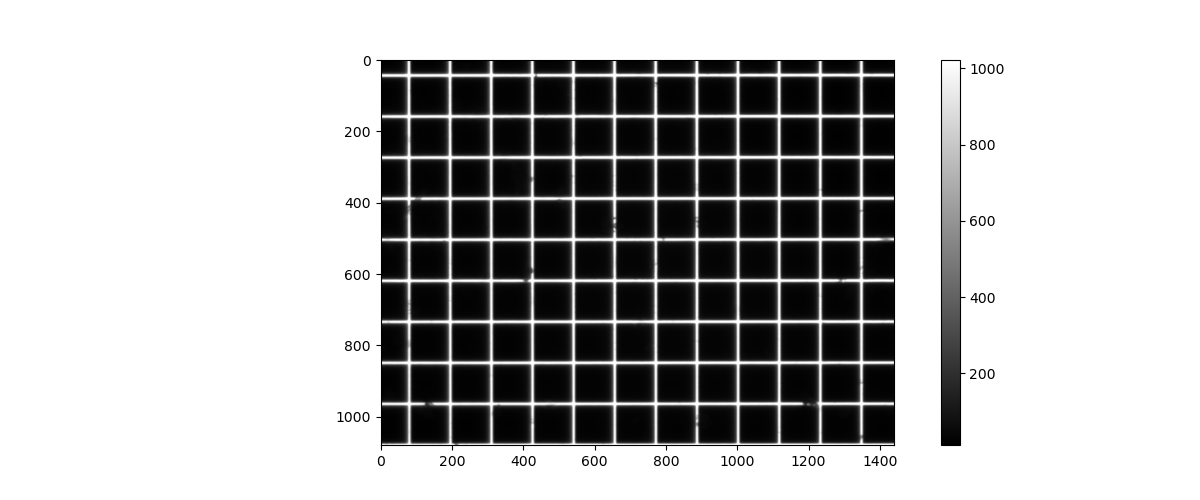

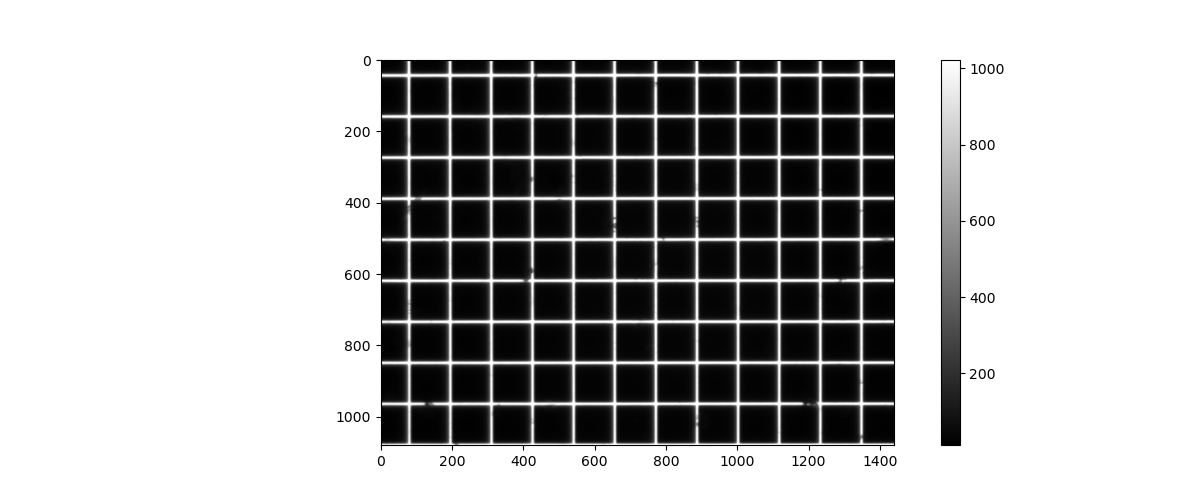

In [ ]:
image_10bit = continuous_capture()

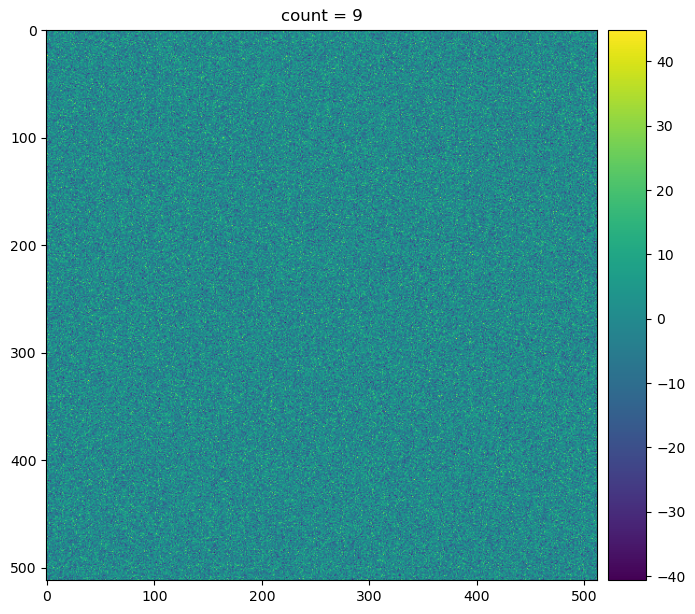

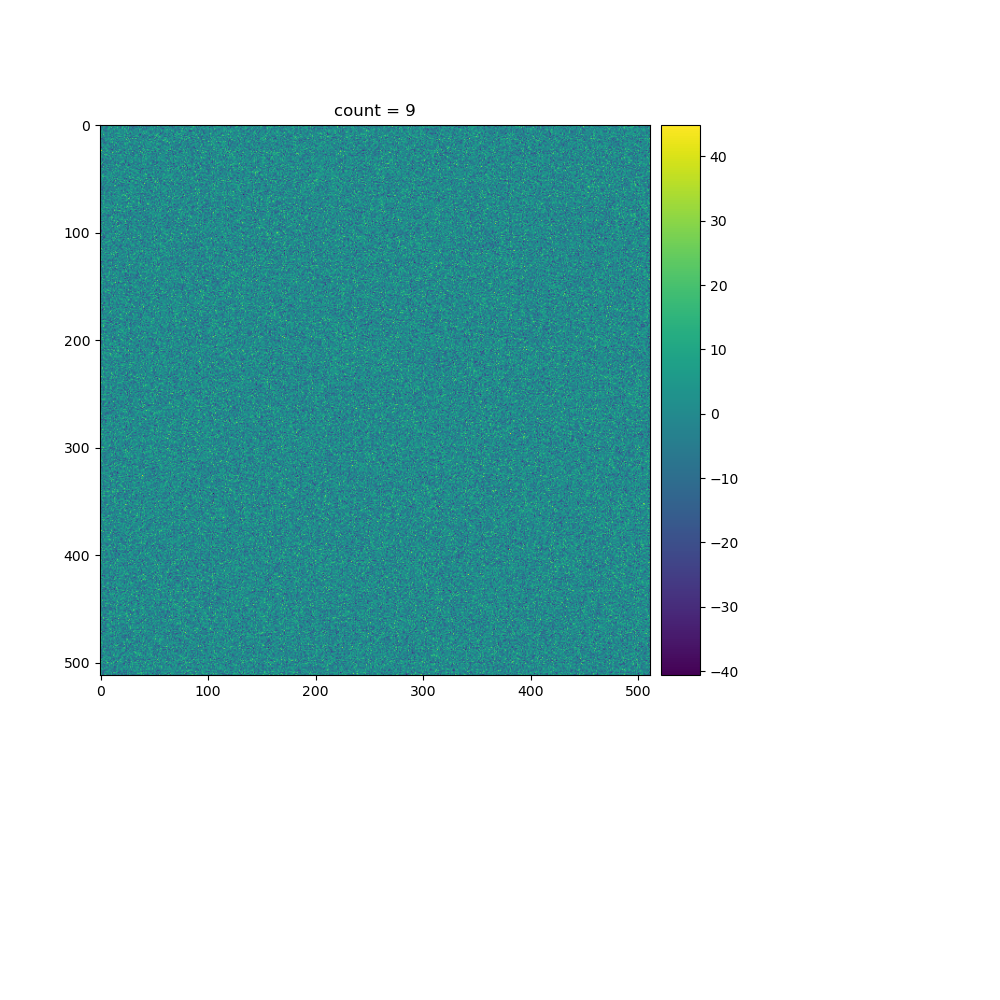

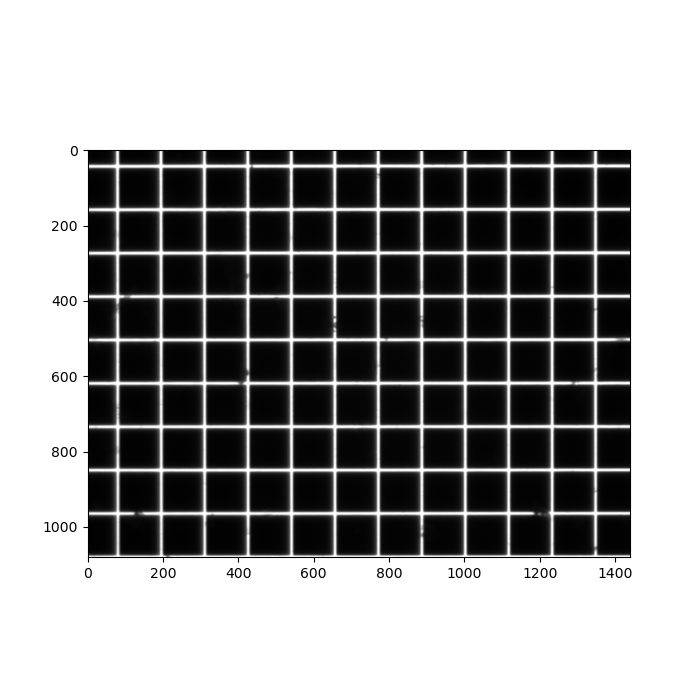

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from IPython.display import display, clear_output

image = cv2.normalize(image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

%matplotlib widget
fig, ax = plt.subplots(figsize=(7, 7))
x = ax.imshow(image, cmap='gray', clim=[0, 255])
pass

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.3, 0.6, 0.6])
# GUI
plt.ion()

img = np.random.randn(512, 512)
im = ax.imshow(img)

ax_divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = ax_divider.append_axes("right", size="7%", pad="2%")
cb = fig.colorbar(im, cax=cax)

hfig = display(fig, display_id=True)

for ct in range(10):
    img = np.random.randn(512, 512) * ct
    im.set_data(img)
    im.set_clim([np.min(img), np.max(img)])
    ax.set_title('count = ' + str(ct))

    fig.canvas.draw()
    fig.canvas.flush_events()
    hfig.update(fig)

plt.show()

<div class="alert alert-block alert-success">
<font color='black'> 2. What is the size of one pixel in the object plane? </font>
</div>

In [ ]:
# distance between 10 grids (1000 um)
x_1 = 1228
y_1 = 39
x_2 = 73
y_2 = 39

d_squared = (x_1-x_2)**2 + (y_1-y_2)**2
d = np.sqrt(d_squared) #number of pixels between 1000 um
print(d)

1155.0


In [ ]:
#pixel size of camera = 5.3 um
pixel_size_camera = 5.3e-6
pixel_size_observed = 1000e-6 / d
print('Pixel size of camera:', pixel_size_camera)
print('Pixel size in object plane:', pixel_size_observed)

Pixel size of camera: 5.3e-06
Pixel size in object plane: 8.658008658008658e-07


Pixel size of camera: 5.3e-06
Pixel size in object plane: 8.658008658008658e-07 m

<div class="alert alert-block alert-success">
<font color='black'> 3. Magnification is the ratio of the size of the detected image to the size of the real object. What is the magnification of your system? </font>
</div>

In [ ]:
magnification = pixel_size_camera / pixel_size_observed
print(magnification)

6.1215


6.1215

<div class="alert alert-block alert-success">

<font color='black'>4. Take an image of the line pairs region (green circle above) in the resolution target and paste it below with a color bar and proper axis labels (mm).</font>

</div>

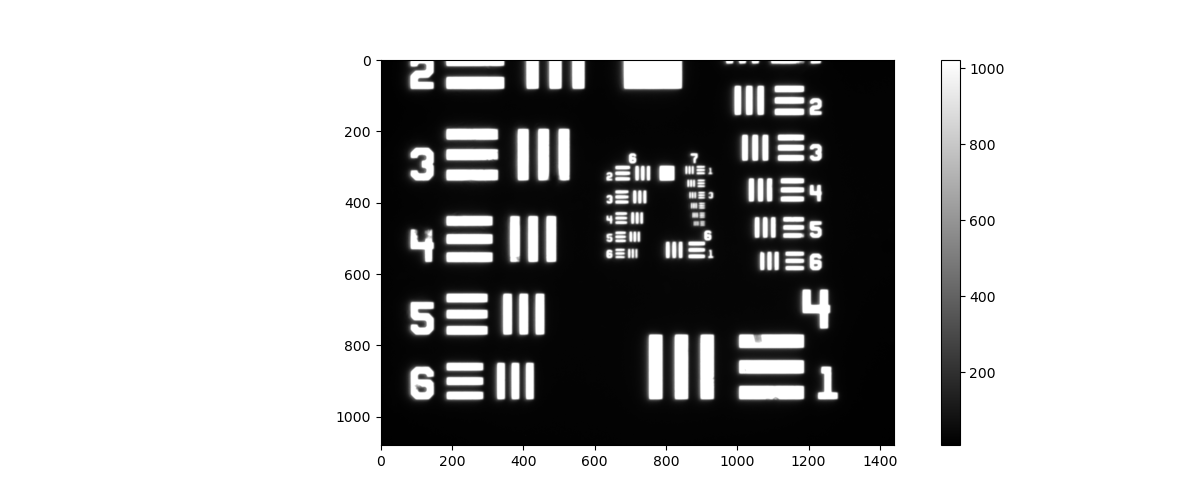

In [ ]:
line_pairs_image = continuous_capture()

<div class="alert alert-block alert-success">

<font color='black'>5. What are the finest line pairs that you can resolve? Show a zoomed image including the line pairs above and below this limit. (The following table will help you find the lp/mm for each target. Values are in lp/mm. The element number is labeled on the left of each line pair target; the group number is on top.)</font>

</div>

<img src="Lab1\LinePairTable.png" style="width:600px">

In [ ]:
# group 7, element 3

# Devise a strategy to measure the focal length of your lens

<div class="alert alert-block alert-warning">

<font color='black'> In lecture you learned about the lens equation, which permits you to compute the location of a focused image given the position of the object and the focal length of the lens. Thus, to design a system with a specific magnification, you need to know the focal length of the lens. This is straightforward if you can measure the distance between the lens and object and image; however, this is not necessarily easy when these planes are hidden within optical elements. Thus, we explore an alternate approach.</font>

<font color='black'> Restating the lens equation, we know:
\begin{equation}
\frac{1}{a} + \frac{1}{b} = \frac{1}{f}
\end{equation} </font>
    
    
<font color='black'> Consider the case where you measure the magnification in two focused optical systems but change the distance to the camera by a known amount (e.g. adding an optical tube of known length, z). The lens equation holds for both systems, but a and b will both change. Thus, you have: </font>
    
<font color='black'> \begin{equation}
\frac{1}{a_1} + \frac{1}{b_1} = \frac{1}{f}
\end{equation} </font>
    
<font color='black'> \begin{equation}
\frac{1}{a_1+z} + \frac{1}{b_2} = \frac{1}{f}
\end{equation} </font>

<font color='black'> You already know how to measure magnification in each system and that magnification is related to object and image planes through the following equations: </font>
    
<font color='black'> \begin{equation}
M_1 = \frac{a_1}{b_1}
\end{equation} </font>

<font color='black'> \begin{equation}
M_2 = \frac{a_1+z}{b_2}
\end{equation} </font>

<font color='black'> This means you have four equations and four unknowns ($a_1$, $b_1$, $b_2$, $f$) and two measured values ($M_1$, $M_2$) and one known value ($z$).  </font>

</div>

<div class="alert alert-block alert-success">
    
<font color='black'> 1. Derive and state the mathematical relationship between $f$ and ($M_1$, $M_2$, $z$). Show a few intermediate steps.  </font>
    

$$\frac{1}{a_1} + \frac{1}{b_1} = \frac{1}{f}$$

$$\frac{1}{a_1 + z} + \frac{1}{b_2} = \frac{1}{f}$$

$$M_1 = \frac{a_1}{b_1}$$

$$M_2 = \frac{a_1 + z}{b_2}$$

$$b_1 = \frac{a_1}{M_1}$$

$$b_2 = \frac{a_1 + z}{M_2}$$

$$\frac{1}{a_1} + \frac{M_1}{a_1} = \frac{1}{f}$$

$$\frac{1 + M_1}{a_1} = \frac{1}{f}$$

$$a_1 = f(1 + M_1)$$

$$\frac{1}{a_1 + z} + \frac{M_2}{a_1 + z} = \frac{1}{f}$$

$$\frac{1 + M_2}{a_1 + z} = \frac{1}{f}$$

$$a_1 + z = f(1 + M_2)$$

$$f(1 + M_1) + z = f(1 + M_2)$$

$$f(M_2 - M_1) = z$$

$$f = \frac{z}{M_2 - M_1}$$


<div class="alert alert-block alert-success">
    
<font color='black'> 2. What is the focal length of your lens in mm? ___________ </font>     

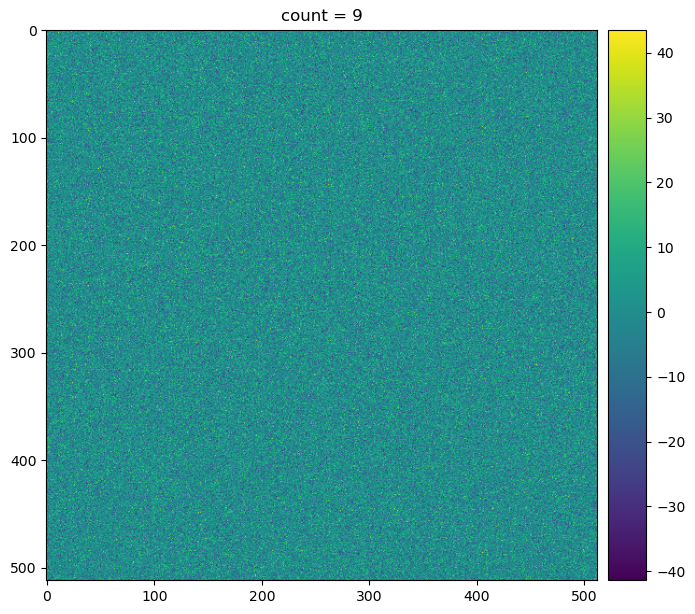

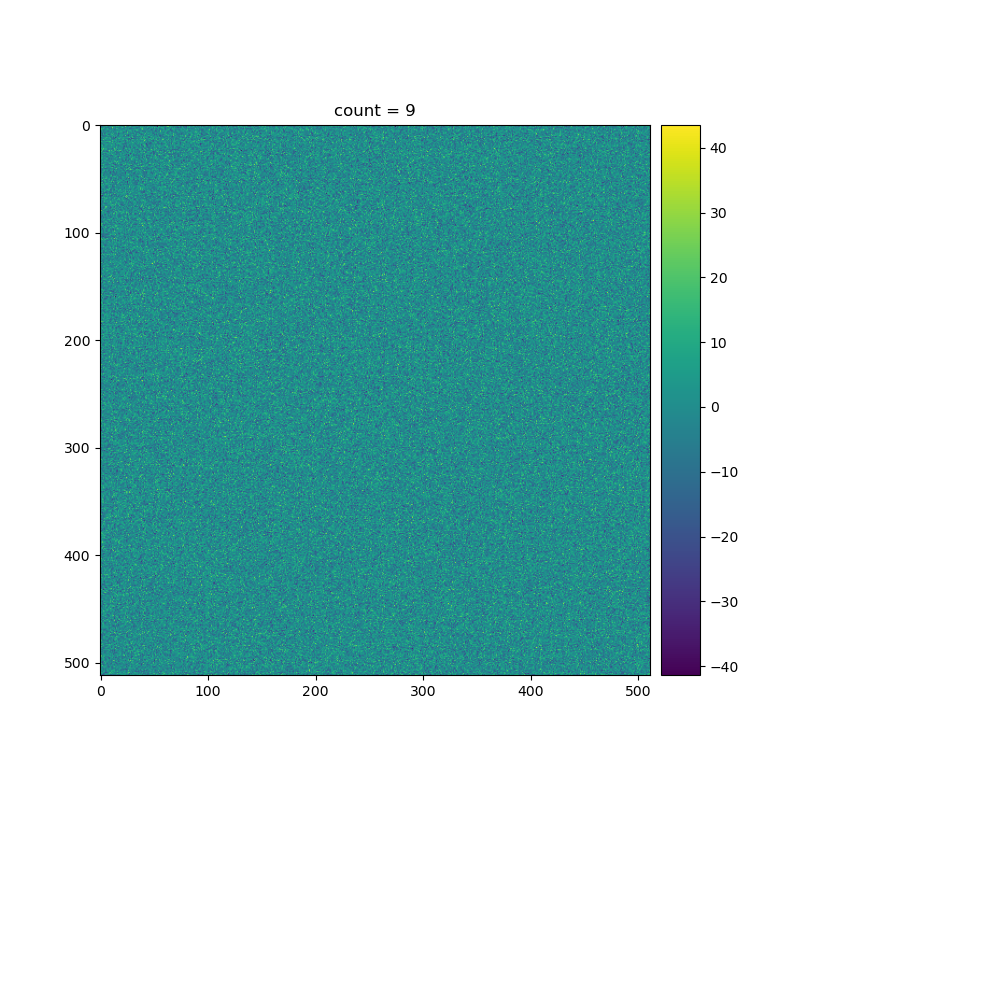

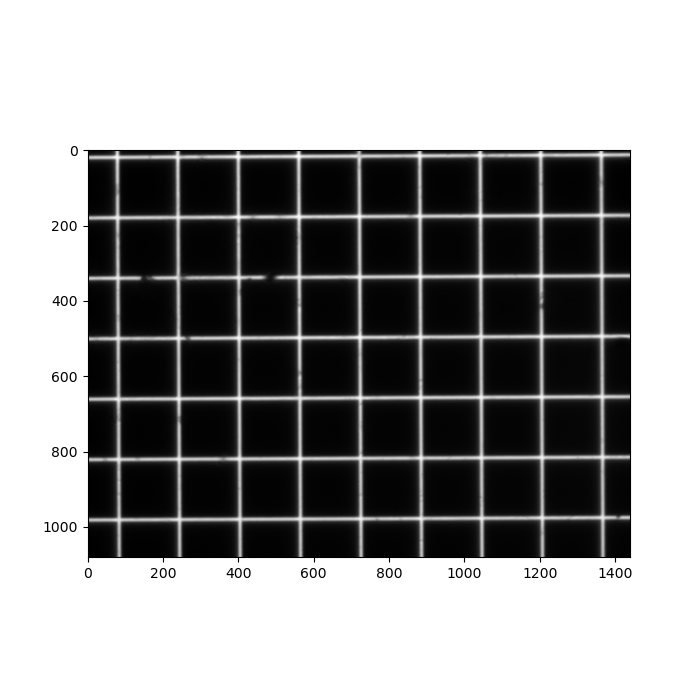

In [ ]:
image_10bit = continuous_capture()
image_8bit = cv2.normalize(image_10bit, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

%matplotlib widget
fig, ax = plt.subplots(figsize=(7, 7))
x = ax.imshow(image_8bit, cmap='gray', clim=[0, 255])
pass

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.3, 0.6, 0.6])
# GUI
plt.ion()

img = np.random.randn(512, 512)
im = ax.imshow(img)

ax_divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = ax_divider.append_axes("right", size="7%", pad="2%")
cb = fig.colorbar(im, cax=cax)

hfig = display(fig, display_id=True)

for ct in range(10):
    img = np.random.randn(512, 512) * ct
    im.set_data(img)
    im.set_clim([np.min(img), np.max(img)])
    ax.set_title('count = ' + str(ct))

    fig.canvas.draw()
    fig.canvas.flush_events()
    hfig.update(fig)

plt.show()

In [ ]:

# @title
x_1 = 1363
y_1 = 14
x_2 = 73
y_2 = 17

d_squared = (x_1-x_2)**2 + (y_1-y_2)**2
d = np.sqrt(d_squared)

pixel_size_camera = 5.3e-6 #meters
pixel_size_observed = 800e-6 / d #meters
print('Pixel size of camera (meters):', pixel_size_camera)
print('Pixel size in object plane (meters):', pixel_size_observed)

magnification = pixel_size_camera / pixel_size_observed
print('Magnification:', magnification)

Pixel size of camera: 5.3e-06
Pixel size in object plane: 6.201533617653057e-07
Magnification: 8.54627311043387


f = z / (M2 - M1) \\
M2 = 8.5463 \\
M1 = 6.1215 \\
z = 0.0508 meters \\

f = 0.02095 meters = 20.95 mm

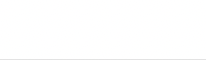

# Build a system to achieve a specific magnification goal

<div class="alert alert-block alert-success">

<font color='black'> 1. From the nominal microscope design that uses only the ½”, 1”, and 2” tubes, how much additional tube length is required to obtain a system with a magnification of 2.4x? </font>
</div>

<div class="alert alert-block alert-success">

<font color='black'> 2. How would you achieve this using available tubes?  (The available tube lengths are: 2”, 1”, 0.5”, 0.3”). <br/><br/> Record the tube lengths you have designed, and we will build this system in class next time.</font>

</div>

If we want 2.4x magnification from the original camera pixel size: \\

z = f(M2-M1) \\
f = 0.02095 meters \\
M2 = 2.4 \\
M1 = 6.1215 \\

z = -0.07796542 meters = 77.97 mm = ~3.07 inches \\

Thus we would remove 3 inches of tubes (1" and 2" tubes)

If we want 2.4x the current system's magnification: \\

*   List item
*   List item



z = f(M2-M1) \\
f = 0.02095 meters \\
M2 = 14.6916 \\
M1 = 6.1215 \\

z = 0.17954 meters = 179.54 mm = ~7.07 inches \\

Thus we would add 7 inches of tubes.